In [0]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [6]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
data.drop(columns=['keyword', 'location', 'id'], inplace=True)

In [8]:
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
from sklearn.model_selection import train_test_split

X = data['text']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [12]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 12)                204       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7

In [0]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [0]:
cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=20)

In [15]:
modelo = model.fit(training_padded, y_train, epochs=350, batch_size=128, validation_data=(testing_padded, y_test), callbacks=cb)

Epoch 1/350
42/42 [==============================] - 0s 9ms/step - loss: 0.6933 - accuracy: 0.4892 - val_loss: 0.6929 - val_accuracy: 0.5810
Epoch 2/350
42/42 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5558 - val_loss: 0.6923 - val_accuracy: 0.5810
Epoch 3/350
42/42 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5650 - val_loss: 0.6912 - val_accuracy: 0.5810
Epoch 4/350
42/42 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5658 - val_loss: 0.6900 - val_accuracy: 0.5810
Epoch 5/350
42/42 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5658 - val_loss: 0.6893 - val_accuracy: 0.5810
Epoch 6/350
42/42 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.5658 - val_loss: 0.6885 - val_accuracy: 0.5810
Epoch 7/350
42/42 [==============================] - 0s 6ms/step - loss: 0.6894 - accuracy: 0.5658 - val_loss: 0.6878 - val_accuracy: 0.5810
Epoch 8/350
4

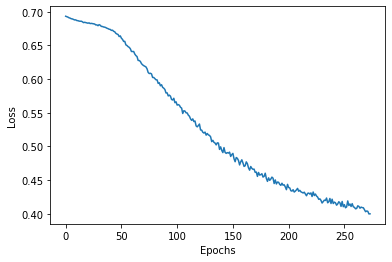

In [16]:

plt.plot(modelo.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

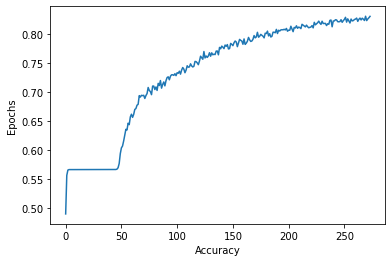

In [17]:
plt.plot(modelo.history['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.show()

## **Making Predictions**

In [20]:
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
data_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [111]:
data_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [0]:
data_test.drop(columns=['keyword', 'location'], inplace=True)

In [113]:
data_test

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,Storm in RI worse than last hurricane. My city...
3260,10868,Green Line derailment in Chicago http://t.co/U...
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [0]:
d_input = data_test.drop(columns=['id'])

In [115]:
d_input

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...
3260,Green Line derailment in Chicago http://t.co/U...
3261,MEG issues Hazardous Weather Outlook (HWO) htt...


In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(d_input['text'])
word_index = tokenizer.word_index

input_sequences = tokenizer.texts_to_sequences(d_input['text'])
input_padded = pad_sequences(input_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [0]:
# Predicting: 

pred = model.predict(input_padded)

In [0]:
pred = pd.DataFrame(pred, columns=['target'])

In [125]:
pred

,target
0,0.707317
1,0.191756
2,0.351981
3,0.132341
4,0.646898
...,...
3258,0.145602
3259,0.144462
3260,0.389004
3261,0.275127


In [0]:
def reg_sig(cols):
  predictions = cols[0]

  if predictions > 0.5:
    return 1
  else:
    return 0

In [0]:
pred['target'] = pred[['target']].apply(reg_sig, axis=1)

In [128]:
pred

,target
0,1
1,0
2,0
3,0
4,1
...,...
3258,0
3259,0
3260,0
3261,0


In [0]:
data_test.drop(columns=['text'], inplace=True)

In [0]:
data_test = pd.concat([data_test, pred], axis=1)

In [131]:
data_test

,id,target
0,0,1
1,2,0
2,3,0
3,9,0
4,11,1
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [0]:
data_test.set_index('id', inplace=True)

In [133]:
data_test

,target
id,
0,1
2,0
3,0
9,0
11,1
...,...
10861,0
10865,0
10868,0


In [0]:
data_test.to_csv('predictions.csv')